In [2]:
import sklearn
import pandas as pd
import numpy as np
import nltk
import random
import sklearn
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import matplotlib
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import train_test_split
import re
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

In [3]:
np.random.seed(500)
Corpus = pd.read_csv(r"../input_data/drinking/labelled_drinking.csv",encoding='latin-1', skiprows=[227225])
Corpus = Corpus.rename({'alcohol_report_content':'text', 'alcohol_answer_label': 'label'}, axis=1)
Corpus['text'] = Corpus['text'].str.replace('\t',' ')
Corpus.drop(['Unnamed: 0'], axis=1, inplace=True)
Corpus.drop_duplicates(inplace=True)
Corpus['text'] = Corpus['text'].astype(str)

In [4]:
# Preprocessing
stemmer = SnowballStemmer("dutch")
Corpus['text'] = Corpus['text'].str.lower()
Corpus['text'] = [stemmer.stem(text) for text in Corpus['text']]
Corpus['label'] = Corpus['label'].str.replace('Niets gevonden','Nee')
Corpus = Corpus.drop(Corpus[Corpus.label == '--'].index)
Corpus = Corpus.drop(Corpus[Corpus.label == 'Onbekend'].index)
Corpus_backup = Corpus.copy()

In [5]:
stopwords_filter = ['niet', 'niets', 'geen', 'zonder']
with open('../helping_files/stopwords.txt') as file:
    full_stopwords = [line.rstrip() for line in file]
    filtered_stopwords = [item for item in full_stopwords if item not in stopwords_filter]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [7]:
Corpus['label'].value_counts()

Nee    127060
Ja      16107
Name: label, dtype: int64

In [ ]:
Corpus

# Multinomial Naive Bayes

In [19]:
class_priors = [list(item) for item in list(np.random.dirichlet(np.ones(2), size=5))]
parameter_grid = {
                  'clf__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  'clf__fit_prior': [True, False],
                  'clf__class_prior': random.sample(class_priors, k=len(class_priors)),
                  'tfidf__max_df': [0.90, 0.95],
                  'tfidf__min_df': [3, 5]
                 }

# Only negation stopwords kept

In [20]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.770 total time=  17.7s
[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.769 total time=  17.8s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.764 total time=  17.7s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.769 total time=  21.2s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=True, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.769 total time=  23.0s
[CV 1/5] END clf__alpha=10, clf__class_

[CV 2/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.769 total time=  26.7s
[CV 3/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.764 total time=  24.7s
[CV 4/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.769 total time=  26.5s
[CV 5/5] END clf__alpha=0.001, clf__class_prior=[0.1514795451176903, 0.8485204548823098], clf__fit_prior=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.769 total time=  22.0s
0.8891876789830272


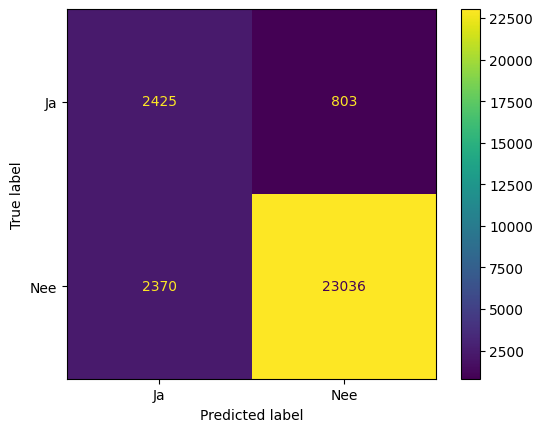

              precision    recall  f1-score   support

          Ja       0.51      0.75      0.60      3228
         Nee       0.97      0.91      0.94     25406

    accuracy                           0.89     28634
   macro avg       0.74      0.83      0.77     28634
weighted avg       0.91      0.89      0.90     28634



In [21]:
# Ngram 1 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', MultinomialNB()),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Stochastic Gradient Descent

In [22]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [23]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

# Stopwords kept

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 108.52, NNZs: 339, Bias: 0.000000, T: 68719, Avg. loss: 0.185421
Total training time: 0.68 seconds.
-- Epoch 2
Norm: 148.64, NNZs: 158, Bias: 0.000000, T: 137438, Avg. loss: 0.132001
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 179.00, NNZs: 132, Bias: 0.000000, T: 206157, Avg. loss: 0.118295
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 204.38, NNZs: 116, Bias: 0.000000, T: 274876, Avg. loss: 0.110474
Total training time: 2.54 seconds.
-- Epoch 5
Norm: 226.80, NNZs: 103, Bias: 0.000000, T: 343595, Avg. loss: 0.104957
Total training time: 3.25 seconds.
-- Epoch 6
Norm: 246.84, NNZs: 95, Bias: 0.000000, T: 412314, Avg. loss: 0.100563
Total training time: 4.02 seconds.
-- Epoch 7
Norm: 250.45, NNZs: 95, Bias: 0.000000, T: 481033, Avg. loss: 0.098342
Total training time: 4.69 seconds.
-- Epoch 8
Norm: 253.99, NNZs: 94, Bias: 0.000000, T: 549752, Avg. loss: 0.097724
Total training time: 5.34 seconds.

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.177 total time= 1.4min
-- Epoch 1
Norm: 108.31, NNZs: 368, Bias: 0.000000, T: 68719, Avg. loss: 0.185086
Total training time: 0.67 seconds.
-- Epoch 2
Norm: 148.94, NNZs: 161, Bias: 0.000000, T: 137438, Avg. loss: 0.131689
Total training time: 1.35 seconds.
-- Epoch 3
Norm: 179.18, NNZs: 133, Bias: 0.000000, T: 206157, Avg. loss: 0.118164
Total training time: 1.95 seconds.
-- Epoch 4
Norm: 204.57, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.110454
Total training time: 2.58 seconds.
-- Epoch 5
Norm: 227.07, NNZs: 107, Bias: 0.000000, T: 343595, Avg. loss: 0.104624
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.175 total time= 1.4min
-- Epoch 1
Norm: 108.05, NNZs: 350, Bias: 0.000000, T: 68719, Avg. loss: 0.186570
Total training time: 0.81 seconds.
-- Epoch 2
Norm: 148.56, NNZs: 160, Bias: 0.000000, T: 137438, Avg. loss: 0.132930
Total training time: 1.67 seconds.
-- Epoch 3
Norm: 179.17, NNZs: 136, Bias: 0.000000, T: 206157, Avg. loss: 0.118932
Total training time: 2.50 seconds.
-- Epoch 4
Norm: 204.61, NNZs: 120, Bias: 0.000000, T: 274876, Avg. loss: 0.111106
Total training time: 3.61 seconds.
-- Epoch 5
Norm: 226.93, NNZs: 103, Bias: 0.000000, T: 343595, Avg. loss: 0.105336
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.181 total time= 1.4min
-- Epoch 1
Norm: 108.37, NNZs: 327, Bias: 0.000000, T: 68720, Avg. loss: 0.185412
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 148.76, NNZs: 160, Bias: 0.000000, T: 137440, Avg. loss: 0.131400
Total training time: 1.71 seconds.
-- Epoch 3
Norm: 179.13, NNZs: 135, Bias: 0.000000, T: 206160, Avg. loss: 0.117785
Total training time: 2.55 seconds.
-- Epoch 4
Norm: 204.64, NNZs: 119, Bias: 0.000000, T: 274880, Avg. loss: 0.110211
Total training time: 3.33 seconds.
-- Epoch 5
Norm: 227.00, NNZs: 105, Bias: 0.000000, T: 343600, Avg. loss: 0.104592
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.173 total time= 1.4min
-- Epoch 1
Norm: 107.94, NNZs: 373, Bias: 0.000000, T: 68720, Avg. loss: 0.186289
Total training time: 0.71 seconds.
-- Epoch 2
Norm: 148.54, NNZs: 162, Bias: 0.000000, T: 137440, Avg. loss: 0.132559
Total training time: 1.32 seconds.
-- Epoch 3
Norm: 178.97, NNZs: 136, Bias: 0.000000, T: 206160, Avg. loss: 0.119041
Total training time: 2.03 seconds.
-- Epoch 4
Norm: 204.48, NNZs: 121, Bias: 0.000000, T: 274880, Avg. loss: 0.111027
Total training time: 2.85 seconds.
-- Epoch 5
Norm: 226.92, NNZs: 108, Bias: 0.000000, T: 343600, Avg. loss: 0.105233
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.179 total time= 1.4min
-- Epoch 1
Norm: 128447375302519.77, NNZs: 430309, Bias: 0.000000, T: 68719, Avg. loss: 163793845016741785108480.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 121498915898900.33, NNZs: 430309, Bias: 0.000000, T: 137438, Avg. loss: 144578438385947599962112.000000
Total training time: 0.97 seconds.
-- Epoch 3
Norm: 117950915494321.81, NNZs: 430309, Bias: 0.000000, T: 206157, Avg. loss: 120628560669483806490624.000000
Total training time: 1.41 seconds.
-- Epoch 4
Norm: 115609867721701.86, NNZs: 430309, Bias: 0.000000, T: 274876, Avg. loss: 10935000

Norm: 268.23, NNZs: 149, Bias: 0.000000, T: 412314, Avg. loss: 0.027984
Total training time: 2.24 seconds.
Convergence after 6 epochs took 2.28 seconds
[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.984 total time= 1.2min
-- Epoch 1
Norm: 136.00, NNZs: 507, Bias: 0.000000, T: 68719, Avg. loss: 0.070891
Total training time: 0.50 seconds.
-- Epoch 2
Norm: 175.52, NNZs: 203, Bias: 0.000000, T: 137438, Avg. loss: 0.037746
Total training time: 1.03 seconds.
-- Epoch 3
Norm: 204.54, NNZs: 182, Bias: 0.000000, T: 206157, Avg. loss: 0.032947
Total training time: 1.40 seconds.
-- Epoch 4
Norm: 228.59, NNZs: 176, Bias: 0.000000, T: 

Norm: 166.56, NNZs: 252, Bias: 0.000000, T: 343595, Avg. loss: 0.078783
Total training time: 2.96 seconds.
-- Epoch 6
Norm: 180.30, NNZs: 255, Bias: 0.000000, T: 412314, Avg. loss: 0.078108
Total training time: 3.58 seconds.
Convergence after 6 epochs took 3.62 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.182 total time= 1.2min
-- Epoch 1
Norm: 85.64, NNZs: 434, Bias: 0.000000, T: 68720, Avg. loss: 0.122567
Total training time: 0.46 seconds.
-- Epoch 2
Norm: 113.36, NNZs: 314, Bias: 0.000000, T: 137440, Avg. loss: 0.085992
Total training time: 1.02 seconds.
-- Epoch 3
Norm: 133.70, NNZs: 298, Bias: 0.000000, 

Norm: 4.28, NNZs: 707890, Bias: 0.498796, T: 274880, Avg. loss: 0.055601
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 4.31, NNZs: 707890, Bias: 0.517713, T: 343600, Avg. loss: 0.054220
Total training time: 1.56 seconds.
-- Epoch 6
Norm: 4.34, NNZs: 707890, Bias: 0.533074, T: 412320, Avg. loss: 0.053223
Total training time: 1.88 seconds.
Convergence after 6 epochs took 1.92 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.470 total time= 1.2min
-- Epoch 1
Norm: 23.66, NNZs: 483707, Bias: 0.903175, T: 68719, Avg. loss: 0.073881
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 22.51, NNZs: 525675, Bias: 0.870573, 

Norm: 333.95, NNZs: 157, Bias: 0.000000, T: 206157, Avg. loss: 0.037202
Total training time: 0.79 seconds.
-- Epoch 4
Norm: 370.29, NNZs: 135, Bias: 0.000000, T: 274876, Avg. loss: 0.034324
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 401.73, NNZs: 127, Bias: 0.000000, T: 343595, Avg. loss: 0.032724
Total training time: 1.28 seconds.
-- Epoch 6
Norm: 429.54, NNZs: 114, Bias: 0.000000, T: 412314, Avg. loss: 0.031287
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.995 total time=  54.0s
-- Epoch 1
Norm: 227.00, NNZs: 257, Bias: 0.000000, T: 

-- Epoch 2
Norm: 1.68, NNZs: 430627, Bias: 0.000000, T: 137440, Avg. loss: 0.759242
Total training time: 0.37 seconds.
-- Epoch 3
Norm: 1.78, NNZs: 430627, Bias: 0.000000, T: 206160, Avg. loss: 0.754588
Total training time: 0.55 seconds.
-- Epoch 4
Norm: 1.84, NNZs: 430627, Bias: 0.000000, T: 274880, Avg. loss: 0.748832
Total training time: 0.73 seconds.
-- Epoch 5
Norm: 1.89, NNZs: 430627, Bias: 0.000000, T: 343600, Avg. loss: 0.742597
Total training time: 0.91 seconds.
-- Epoch 6
Norm: 1.94, NNZs: 430627, Bias: 0.000000, T: 412320, Avg. loss: 0.736660
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.13 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.822 total time=  56.4s
-- Epoch 1
Norm: 44.63, NNZs: 430580, Bias: 0.000000, T: 68719, Avg. loss: 0.314194
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 44.68, NNZs: 430580, Bias: 0.000000, T: 137438, Avg. loss: 0.289026
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 44.69, NNZs: 430580, Bias: 0.000000, T: 206157, Avg. loss: 0.289028
Total training time: 0.65 seconds.
-- Epoch 4
Norm: 44.69, NNZs: 430580, Bias: 0.000000, T: 274876, Avg. loss: 0.289028
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 44.69, NNZs: 430580, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.820 total time=  56.0s
-- Epoch 1
Norm: 44.49, NNZs: 430197, Bias: 0.000000, T: 68719, Avg. loss: 0.313364
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 44.54, NNZs: 430197, Bias: 0.000000, T: 137438, Avg. loss: 0.288229
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 44.54, NNZs: 430197, Bias: 0.000000, T: 206157, Avg. loss: 0.288230
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 44.54, NNZs: 430197, Bias: 0.000000, T: 274876, Avg. loss: 0.288230
Total training time: 0.88 seconds.
-- Epoch 5
Norm: 44.54, NNZs: 430197, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.821 total time= 1.0min
-- Epoch 1
Norm: 44.55, NNZs: 430630, Bias: 0.000000, T: 68720, Avg. loss: 0.313573
Total training time: 0.18 seconds.
-- Epoch 2
Norm: 44.60, NNZs: 430630, Bias: 0.000000, T: 137440, Avg. loss: 0.288551
Total training time: 0.41 seconds.
-- Epoch 3
Norm: 44.60, NNZs: 430630, Bias: 0.000000, T: 206160, Avg. loss: 0.288552
Total training time: 0.62 seconds.
-- Epoch 4
Norm: 44.60, NNZs: 430630, Bias: 0.000000, T: 274880, Avg. loss: 0.288552
Total training time: 0.85 seconds.
-- Epoch 5
Norm: 44.60, NNZs: 430630, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.823 total time=  55.3s
-- Epoch 1
Norm: 45.08, NNZs: 430849, Bias: 0.000000, T: 68720, Avg. loss: 0.311513
Total training time: 0.21 seconds.
-- Epoch 2
Norm: 45.13, NNZs: 430849, Bias: 0.000000, T: 137440, Avg. loss: 0.287062
Total training time: 0.44 seconds.
-- Epoch 3
Norm: 45.13, NNZs: 430849, Bias: 0.000000, T: 206160, Avg. loss: 0.287063
Total training time: 0.67 seconds.
-- Epoch 4
Norm: 45.13, NNZs: 430849, Bias: 0.000000, T: 274880, Avg. loss: 0.287063
Total training time: 0.91 seconds.
-- Epoch 5
Norm: 45.13, NNZs: 430849, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.822 total time=  57.6s
-- Epoch 1
Norm: 13.63, NNZs: 266024, Bias: 0.342394, T: 68719, Avg. loss: 0.018033
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 7.91, NNZs: 286903, Bias: 0.249113, T: 137438, Avg. loss: 0.000381
Total training time: 0.23 seconds.
-- Epoch 3
Norm: 5.67, NNZs: 293833, Bias: 0.207876, T: 206157, Avg. loss: 0.000093
Total training time: 0.36 seconds.
-- Epoch 4
Norm: 4.50, NNZs: 298513, Bias: 0.182032, T: 274876, Avg. loss: 0.000047
Total training time: 0.48 seconds.
-- Epoch 5
Norm: 3.77, NNZs: 301805, Bias: 0.164049, T: 343595, Avg. loss: 0.000

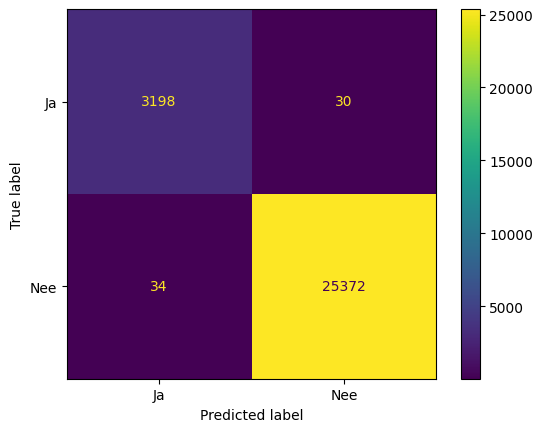

              precision    recall  f1-score   support

          Ja       0.99      0.99      0.99      3228
         Nee       1.00      1.00      1.00     25406

    accuracy                           1.00     28634
   macro avg       0.99      0.99      0.99     28634
weighted avg       1.00      1.00      1.00     28634



In [25]:
# Ngram 2 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 112.56, NNZs: 539, Bias: 0.000000, T: 68719, Avg. loss: 0.192133
Total training time: 0.87 seconds.
-- Epoch 2
Norm: 153.56, NNZs: 176, Bias: 0.000000, T: 137438, Avg. loss: 0.138514
Total training time: 1.79 seconds.
-- Epoch 3
Norm: 184.58, NNZs: 145, Bias: 0.000000, T: 206157, Avg. loss: 0.126367
Total training time: 2.65 seconds.
-- Epoch 4
Norm: 210.46, NNZs: 119, Bias: 0.000000, T: 274876, Avg. loss: 0.119084
Total training time: 3.52 seconds.
-- Epoch 5
Norm: 233.19, NNZs: 112, Bias: 0.000000, T: 343595, Avg. loss: 0.114278
Total training time: 4.41 seconds.
-- Epoch 6
Norm: 253.81, NNZs: 109, Bias: 0.000000, T: 412314, Avg. loss: 0.110808
Total training time: 5.31 seconds.
-- Epoch 7
Norm: 257.57, NNZs: 109, Bias: 0.000000, T: 481033, Avg. loss: 0.109178
Total training time: 6.22 seconds.
-- Epoch 8
Norm: 261.24, NNZs: 107, Bias: 0.000000, T: 549752, Avg. loss: 0.108499
Total training time: 7.14 secon

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.183 total time= 2.0min
-- Epoch 1
Norm: 112.55, NNZs: 488, Bias: 0.000000, T: 68719, Avg. loss: 0.192802
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 153.47, NNZs: 165, Bias: 0.000000, T: 137438, Avg. loss: 0.139111
Total training time: 1.89 seconds.
-- Epoch 3
Norm: 184.40, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.126976
Total training time: 2.84 seconds.
-- Epoch 4
Norm: 210.37, NNZs: 125, Bias: 0.000000, T: 274876, Avg. loss: 0.119638
Total training time: 3.78 seconds.
-- Epoch 5
Norm: 233.27, NNZs: 114, Bias: 0.000000, T: 343595, Avg. loss: 0.115035
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.186 total time= 2.0min
-- Epoch 1
Norm: 112.47, NNZs: 476, Bias: 0.000000, T: 68719, Avg. loss: 0.193445
Total training time: 0.84 seconds.
-- Epoch 2
Norm: 153.52, NNZs: 174, Bias: 0.000000, T: 137438, Avg. loss: 0.139891
Total training time: 1.66 seconds.
-- Epoch 3
Norm: 184.31, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.127304
Total training time: 2.52 seconds.
-- Epoch 4
Norm: 210.24, NNZs: 123, Bias: 0.000000, T: 274876, Avg. loss: 0.120377
Total training time: 3.42 seconds.
-- Epoch 5
Norm: 233.16, NNZs: 109, Bias: 0.000000, T: 343595, Avg. loss: 0.115210
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.188 total time= 1.9min
-- Epoch 1
Norm: 112.80, NNZs: 513, Bias: 0.000000, T: 68720, Avg. loss: 0.190938
Total training time: 0.90 seconds.
-- Epoch 2
Norm: 153.93, NNZs: 178, Bias: 0.000000, T: 137440, Avg. loss: 0.137510
Total training time: 1.82 seconds.
-- Epoch 3
Norm: 184.78, NNZs: 141, Bias: 0.000000, T: 206160, Avg. loss: 0.124999
Total training time: 2.75 seconds.
-- Epoch 4
Norm: 210.79, NNZs: 121, Bias: 0.000000, T: 274880, Avg. loss: 0.117856
Total training time: 3.67 seconds.
-- Epoch 5
Norm: 233.68, NNZs: 110, Bias: 0.000000, T: 343600, Avg. loss: 0.112994
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.182 total time= 2.0min
-- Epoch 1
Norm: 112.41, NNZs: 557, Bias: 0.000000, T: 68720, Avg. loss: 0.190976
Total training time: 0.85 seconds.
-- Epoch 2
Norm: 153.49, NNZs: 170, Bias: 0.000000, T: 137440, Avg. loss: 0.137641
Total training time: 1.75 seconds.
-- Epoch 3
Norm: 184.42, NNZs: 140, Bias: 0.000000, T: 206160, Avg. loss: 0.125366
Total training time: 2.62 seconds.
-- Epoch 4
Norm: 210.21, NNZs: 117, Bias: 0.000000, T: 274880, Avg. loss: 0.118507
Total training time: 3.51 seconds.
-- Epoch 5
Norm: 233.00, NNZs: 109, Bias: 0.000000, T: 343600, Avg. loss: 0.113663
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.186 total time= 1.9min
-- Epoch 1
Norm: 99090384804286.11, NNZs: 789409, Bias: 0.000000, T: 68719, Avg. loss: 76879507650381445332992.000000
Total training time: 0.54 seconds.
-- Epoch 2
Norm: 93231525337041.33, NNZs: 789416, Bias: 0.000000, T: 137438, Avg. loss: 84868238539672722079744.000000
Total training time: 1.11 seconds.
-- Epoch 3
Norm: 90190614894834.16, NNZs: 789416, Bias: 0.000000, T: 206157, Avg. loss: 70534003784902510641152.000000
Total training time: 1.71 seconds.
-- Epoch 4
Norm: 88175011616439.31, NNZs: 789416, Bias: 0.000000, T: 274876, Avg. loss: 637808007402190

[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.988 total time= 1.7min
-- Epoch 1
Norm: 139.09, NNZs: 776, Bias: 0.000000, T: 68719, Avg. loss: 0.072613
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 181.50, NNZs: 216, Bias: 0.000000, T: 137438, Avg. loss: 0.041404
Total training time: 0.93 seconds.
-- Epoch 3
Norm: 212.64, NNZs: 188, Bias: 0.000000, T: 206157, Avg. loss: 0.036331
Total training time: 1.45 seconds.
-- Epoch 4
Norm: 238.46, NNZs: 174, Bias: 0.000000, T: 274876, Avg. loss: 0.033372
Total training time: 1.98 seconds.
-- Epoch 5
Norm: 260.91, NNZs: 160, Bias: 0.000000, T: 343595, Avg. loss: 0.031899
Total 

Norm: 184.16, NNZs: 246, Bias: 0.000000, T: 412314, Avg. loss: 0.077295
Total training time: 3.42 seconds.
Convergence after 6 epochs took 3.47 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.182 total time= 1.6min
-- Epoch 1
Norm: 86.59, NNZs: 465, Bias: 0.000000, T: 68720, Avg. loss: 0.119950
Total training time: 0.63 seconds.
-- Epoch 2
Norm: 115.03, NNZs: 325, Bias: 0.000000, T: 137440, Avg. loss: 0.086741
Total training time: 1.29 seconds.
-- Epoch 3
Norm: 136.43, NNZs: 297, Bias: 0.000000, T: 206160, Avg. loss: 0.082337
Total training time: 1.97 seconds.
-- Epoch 4
Norm: 154.43, NNZs: 286, Bias: 0.000000, 

Norm: 4.35, NNZs: 1408026, Bias: 0.570187, T: 343600, Avg. loss: 0.053188
Total training time: 1.82 seconds.
-- Epoch 6
Norm: 4.37, NNZs: 1408026, Bias: 0.585084, T: 412320, Avg. loss: 0.052094
Total training time: 2.19 seconds.
Convergence after 6 epochs took 2.25 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.470 total time= 1.6min
-- Epoch 1
Norm: 23.03, NNZs: 876785, Bias: 0.857927, T: 68719, Avg. loss: 0.062111
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 21.75, NNZs: 978742, Bias: 0.819553, T: 137438, Avg. loss: 0.037042
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 21.45, NNZs: 1021765, Bias: 0.8041

Norm: 346.55, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.039530
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 386.04, NNZs: 139, Bias: 0.000000, T: 274876, Avg. loss: 0.036483
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 420.14, NNZs: 123, Bias: 0.000000, T: 343595, Avg. loss: 0.034653
Total training time: 1.77 seconds.
-- Epoch 6
Norm: 450.03, NNZs: 116, Bias: 0.000000, T: 412314, Avg. loss: 0.033219
Total training time: 2.11 seconds.
Convergence after 6 epochs took 2.17 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.996 total time= 1.6min
-- Epoch 1
Norm: 228.77, NNZs: 288, Bias: 0.000000, T: 

-- Epoch 2
Norm: 1.71, NNZs: 789586, Bias: 0.000000, T: 137440, Avg. loss: 0.744315
Total training time: 0.42 seconds.
-- Epoch 3
Norm: 1.83, NNZs: 789586, Bias: 0.000000, T: 206160, Avg. loss: 0.743256
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.91, NNZs: 789586, Bias: 0.000000, T: 274880, Avg. loss: 0.740399
Total training time: 0.90 seconds.
-- Epoch 5
Norm: 1.97, NNZs: 789586, Bias: 0.000000, T: 343600, Avg. loss: 0.736355
Total training time: 1.13 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 789586, Bias: 0.000000, T: 412320, Avg. loss: 0.732492
Total training time: 1.37 seconds.
Convergence after 6 epochs took 1.42 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.841 total time= 1.6min
-- Epoch 1
Norm: 45.62, NNZs: 789966, Bias: 0.000000, T: 68719, Avg. loss: 0.306652
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 45.66, NNZs: 789966, Bias: 0.000000, T: 137438, Avg. loss: 0.280284
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 45.66, NNZs: 789966, Bias: 0.000000, T: 206157, Avg. loss: 0.280291
Total training time: 0.91 seconds.
-- Epoch 4
Norm: 45.66, NNZs: 789966, Bias: 0.000000, T: 274876, Avg. loss: 0.280291
Total training time: 1.23 seconds.
-- Epoch 5
Norm: 45.66, NNZs: 789966, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.845 total time= 1.7min
-- Epoch 1
Norm: 45.62, NNZs: 788964, Bias: 0.000000, T: 68719, Avg. loss: 0.309367
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 45.66, NNZs: 788964, Bias: 0.000000, T: 137438, Avg. loss: 0.282798
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 45.66, NNZs: 788964, Bias: 0.000000, T: 206157, Avg. loss: 0.282806
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 45.66, NNZs: 788964, Bias: 0.000000, T: 274876, Avg. loss: 0.282806
Total training time: 1.17 seconds.
-- Epoch 5
Norm: 45.66, NNZs: 788964, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.842 total time= 1.7min
-- Epoch 1
Norm: 45.46, NNZs: 789557, Bias: 0.000000, T: 68720, Avg. loss: 0.307447
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 45.51, NNZs: 789557, Bias: 0.000000, T: 137440, Avg. loss: 0.281218
Total training time: 0.57 seconds.
-- Epoch 3
Norm: 45.51, NNZs: 789557, Bias: 0.000000, T: 206160, Avg. loss: 0.281225
Total training time: 0.87 seconds.
-- Epoch 4
Norm: 45.51, NNZs: 789557, Bias: 0.000000, T: 274880, Avg. loss: 0.281225
Total training time: 1.18 seconds.
-- Epoch 5
Norm: 45.51, NNZs: 789557, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.847 total time= 1.7min
-- Epoch 1
Norm: 45.87, NNZs: 790001, Bias: 0.000000, T: 68720, Avg. loss: 0.307869
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 45.92, NNZs: 790001, Bias: 0.000000, T: 137440, Avg. loss: 0.281986
Total training time: 0.59 seconds.
-- Epoch 3
Norm: 45.92, NNZs: 790001, Bias: 0.000000, T: 206160, Avg. loss: 0.281994
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 45.92, NNZs: 790001, Bias: 0.000000, T: 274880, Avg. loss: 0.281994
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 45.92, NNZs: 790001, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.841 total time= 1.7min
-- Epoch 1
Norm: 12.60, NNZs: 429630, Bias: 0.244737, T: 68719, Avg. loss: 0.012458
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 7.23, NNZs: 468857, Bias: 0.177291, T: 137438, Avg. loss: 0.000245
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 5.14, NNZs: 482593, Bias: 0.146318, T: 206157, Avg. loss: 0.000054
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 4.02, NNZs: 490456, Bias: 0.128953, T: 274876, Avg. loss: 0.000022
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 3.32, NNZs: 496620, Bias: 0.117762, T: 343595, Avg. loss: 0.000

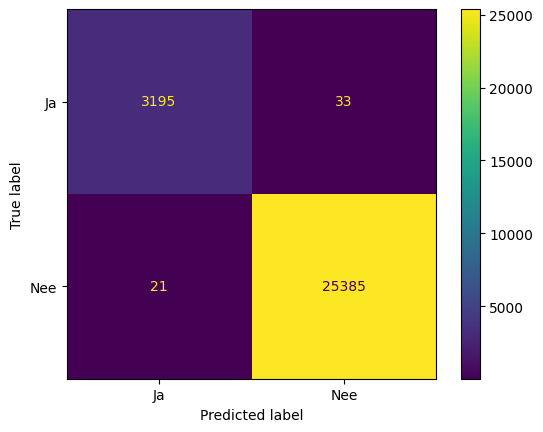

              precision    recall  f1-score   support

          Ja       0.99      0.99      0.99      3228
         Nee       1.00      1.00      1.00     25406

    accuracy                           1.00     28634
   macro avg       1.00      0.99      1.00     28634
weighted avg       1.00      1.00      1.00     28634



In [26]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# Only negation stopwords kept

In [27]:
no_stopwords = lambda x: ' '.join([item for item in x.split() if item not in full_stopwords])
less_stopwords = lambda x: ' '.join([item for item in x.split() if item not in filtered_stopwords])

Corpus["text"] = Corpus["text"].apply(less_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 109.21, NNZs: 373, Bias: 0.000000, T: 68719, Avg. loss: 0.174053
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 148.15, NNZs: 145, Bias: 0.000000, T: 137438, Avg. loss: 0.122441
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 177.55, NNZs: 119, Bias: 0.000000, T: 206157, Avg. loss: 0.109703
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 202.16, NNZs: 101, Bias: 0.000000, T: 274876, Avg. loss: 0.102406
Total training time: 1.45 seconds.
-- Epoch 5
Norm: 223.77, NNZs: 94, Bias: 0.000000, T: 343595, Avg. loss: 0.097211
Total training time: 1.80 seconds.
-- Epoch 6
Norm: 243.41, NNZs: 85, Bias: 0.000000, T: 412314, Avg. loss: 0.093387
Total training time: 2.15 seconds.
-- Epoch 7
Norm: 246.90, NNZs: 83, Bias: 0.000000, T: 481033, Avg. loss: 0.091238
Total training time: 2.51 seconds.
-- Epoch 8
Norm: 250.37, NNZs: 83, Bias: 0.000000, T: 549752, Avg. loss: 0.090733
Total training time: 2.87 seconds.


/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.195 total time=  52.3s
-- Epoch 1
Norm: 109.24, NNZs: 362, Bias: 0.000000, T: 68719, Avg. loss: 0.174728
Total training time: 0.40 seconds.
-- Epoch 2
Norm: 148.33, NNZs: 143, Bias: 0.000000, T: 137438, Avg. loss: 0.123070
Total training time: 0.81 seconds.
-- Epoch 3
Norm: 177.57, NNZs: 116, Bias: 0.000000, T: 206157, Avg. loss: 0.110298
Total training time: 1.19 seconds.
-- Epoch 4
Norm: 202.31, NNZs: 101, Bias: 0.000000, T: 274876, Avg. loss: 0.102940
Total training time: 1.59 seconds.
-- Epoch 5
Norm: 223.91, NNZs: 92, Bias: 0.000000, T: 343595, Avg. loss: 0.097602
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.194 total time=  52.8s
-- Epoch 1
Norm: 109.00, NNZs: 328, Bias: 0.000000, T: 68719, Avg. loss: 0.174879
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 148.21, NNZs: 146, Bias: 0.000000, T: 137438, Avg. loss: 0.122697
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 177.57, NNZs: 113, Bias: 0.000000, T: 206157, Avg. loss: 0.109574
Total training time: 1.05 seconds.
-- Epoch 4
Norm: 202.04, NNZs: 100, Bias: 0.000000, T: 274876, Avg. loss: 0.102319
Total training time: 1.42 seconds.
-- Epoch 5
Norm: 223.64, NNZs: 92, Bias: 0.000000, T: 343595, Avg. loss: 0.097318
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.195 total time=  52.1s
-- Epoch 1
Norm: 109.24, NNZs: 343, Bias: 0.000000, T: 68720, Avg. loss: 0.175818
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 148.38, NNZs: 140, Bias: 0.000000, T: 137440, Avg. loss: 0.123195
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 177.72, NNZs: 115, Bias: 0.000000, T: 206160, Avg. loss: 0.110197
Total training time: 1.07 seconds.
-- Epoch 4
Norm: 202.41, NNZs: 99, Bias: 0.000000, T: 274880, Avg. loss: 0.102645
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 224.12, NNZs: 92, Bias: 0.000000, T: 343600, Avg. loss: 0.097533
Total traini

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.191 total time=  51.3s
-- Epoch 1
Norm: 109.10, NNZs: 378, Bias: 0.000000, T: 68720, Avg. loss: 0.176190
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 148.42, NNZs: 140, Bias: 0.000000, T: 137440, Avg. loss: 0.123753
Total training time: 0.69 seconds.
-- Epoch 3
Norm: 177.87, NNZs: 114, Bias: 0.000000, T: 206160, Avg. loss: 0.110743
Total training time: 1.03 seconds.
-- Epoch 4
Norm: 202.61, NNZs: 101, Bias: 0.000000, T: 274880, Avg. loss: 0.103355
Total training time: 1.39 seconds.
-- Epoch 5
Norm: 224.26, NNZs: 94, Bias: 0.000000, T: 343600, Avg. loss: 0.098050
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.201 total time=  51.1s
-- Epoch 1
Norm: 125263372832980.66, NNZs: 382428, Bias: 0.000000, T: 68719, Avg. loss: 163370752586265359548416.000000
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 118275333975305.59, NNZs: 382428, Bias: 0.000000, T: 137438, Avg. loss: 137032900342441299673088.000000
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 114717111414547.97, NNZs: 382428, Bias: 0.000000, T: 206157, Avg. loss: 113399297656821601271808.000000
Total training time: 0.88 seconds.
-- Epoch 4
Norm: 112372692565183.56, NNZs: 382428, Bias: 0.000000, T: 274876, Avg. loss: 10243844

Norm: 258.90, NNZs: 135, Bias: 0.000000, T: 412314, Avg. loss: 0.025781
Total training time: 1.51 seconds.
Convergence after 6 epochs took 1.55 seconds
[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.990 total time=  45.4s
-- Epoch 1
Norm: 132.27, NNZs: 512, Bias: 0.000000, T: 68719, Avg. loss: 0.066210
Total training time: 0.25 seconds.
-- Epoch 2
Norm: 170.91, NNZs: 182, Bias: 0.000000, T: 137438, Avg. loss: 0.035867
Total training time: 0.51 seconds.
-- Epoch 3
Norm: 199.15, NNZs: 168, Bias: 0.000000, T: 206157, Avg. loss: 0.030683
Total training time: 0.75 seconds.
-- Epoch 4
Norm: 222.56, NNZs: 153, Bias: 0.000000, T: 

Norm: 161.33, NNZs: 270, Bias: 0.000000, T: 343595, Avg. loss: 0.077111
Total training time: 1.42 seconds.
-- Epoch 6
Norm: 174.89, NNZs: 272, Bias: 0.000000, T: 412314, Avg. loss: 0.077047
Total training time: 1.72 seconds.
Convergence after 6 epochs took 1.75 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.172 total time=  44.4s
-- Epoch 1
Norm: 83.13, NNZs: 413, Bias: 0.000000, T: 68720, Avg. loss: 0.115084
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 110.06, NNZs: 310, Bias: 0.000000, T: 137440, Avg. loss: 0.083830
Total training time: 0.54 seconds.
-- Epoch 3
Norm: 129.99, NNZs: 292, Bias: 0.000000, 

-- Epoch 5
Norm: 4.40, NNZs: 655232, Bias: 0.542758, T: 343600, Avg. loss: 0.053167
Total training time: 0.98 seconds.
-- Epoch 6
Norm: 4.42, NNZs: 655232, Bias: 0.557181, T: 412320, Avg. loss: 0.052161
Total training time: 1.18 seconds.
Convergence after 6 epochs took 1.21 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.470 total time=  45.0s
-- Epoch 1
Norm: 22.83, NNZs: 429035, Bias: 0.895538, T: 68719, Avg. loss: 0.067866
Total training time: 0.16 seconds.
-- Epoch 2
Norm: 21.59, NNZs: 470185, Bias: 0.865869, T: 137438, Avg. loss: 0.037424
Total training time: 0.36 seconds.
-- Epoch 3
Norm: 21.33, NNZs: 486858, Bias

Norm: 322.05, NNZs: 138, Bias: 0.000000, T: 206157, Avg. loss: 0.035771
Total training time: 0.53 seconds.
-- Epoch 4
Norm: 357.20, NNZs: 124, Bias: 0.000000, T: 274876, Avg. loss: 0.032664
Total training time: 0.71 seconds.
-- Epoch 5
Norm: 387.08, NNZs: 116, Bias: 0.000000, T: 343595, Avg. loss: 0.030754
Total training time: 0.92 seconds.
-- Epoch 6
Norm: 414.03, NNZs: 113, Bias: 0.000000, T: 412314, Avg. loss: 0.029853
Total training time: 1.09 seconds.
Convergence after 6 epochs took 1.12 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.996 total time=  43.7s
-- Epoch 1
Norm: 217.79, NNZs: 226, Bias: 0.000000, T: 

Norm: 1.69, NNZs: 382863, Bias: 0.000000, T: 137440, Avg. loss: 0.739522
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.81, NNZs: 382863, Bias: 0.000000, T: 206160, Avg. loss: 0.736310
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 382863, Bias: 0.000000, T: 274880, Avg. loss: 0.730942
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.95, NNZs: 382863, Bias: 0.000000, T: 343600, Avg. loss: 0.725462
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 2.00, NNZs: 382863, Bias: 0.000000, T: 412320, Avg. loss: 0.720133
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__w

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.841 total time=  45.8s
-- Epoch 1
Norm: 44.88, NNZs: 382812, Bias: 0.000000, T: 68719, Avg. loss: 0.299389
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 44.93, NNZs: 382812, Bias: 0.000000, T: 137438, Avg. loss: 0.274012
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 44.93, NNZs: 382812, Bias: 0.000000, T: 206157, Avg. loss: 0.274018
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 44.93, NNZs: 382812, Bias: 0.000000, T: 274876, Avg. loss: 0.274018
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 44.93, NNZs: 382812, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.843 total time=  45.8s
-- Epoch 1
Norm: 44.61, NNZs: 382439, Bias: 0.000000, T: 68719, Avg. loss: 0.297698
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 44.65, NNZs: 382439, Bias: 0.000000, T: 137438, Avg. loss: 0.272475
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 44.65, NNZs: 382439, Bias: 0.000000, T: 206157, Avg. loss: 0.272480
Total training time: 0.49 seconds.
-- Epoch 4
Norm: 44.65, NNZs: 382439, Bias: 0.000000, T: 274876, Avg. loss: 0.272480
Total training time: 0.66 seconds.
-- Epoch 5
Norm: 44.65, NNZs: 382439, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.842 total time=  46.2s
-- Epoch 1
Norm: 44.92, NNZs: 382855, Bias: 0.000000, T: 68720, Avg. loss: 0.299057
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 44.96, NNZs: 382855, Bias: 0.000000, T: 137440, Avg. loss: 0.273705
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 44.96, NNZs: 382855, Bias: 0.000000, T: 206160, Avg. loss: 0.273710
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 44.96, NNZs: 382855, Bias: 0.000000, T: 274880, Avg. loss: 0.273710
Total training time: 0.65 seconds.
-- Epoch 5
Norm: 44.96, NNZs: 382855, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.843 total time=  46.4s
-- Epoch 1
Norm: 45.27, NNZs: 383194, Bias: 0.000000, T: 68720, Avg. loss: 0.295790
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 45.31, NNZs: 383194, Bias: 0.000000, T: 137440, Avg. loss: 0.271395
Total training time: 0.31 seconds.
-- Epoch 3
Norm: 45.31, NNZs: 383194, Bias: 0.000000, T: 206160, Avg. loss: 0.271399
Total training time: 0.48 seconds.
-- Epoch 4
Norm: 45.31, NNZs: 383194, Bias: 0.000000, T: 274880, Avg. loss: 0.271399
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 45.31, NNZs: 383194, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.843 total time=  46.7s
-- Epoch 1
Norm: 12.90, NNZs: 222634, Bias: 0.302324, T: 68719, Avg. loss: 0.014621
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 7.54, NNZs: 242335, Bias: 0.211393, T: 137438, Avg. loss: 0.000343
Total training time: 0.18 seconds.
-- Epoch 3
Norm: 5.38, NNZs: 248879, Bias: 0.179887, T: 206157, Avg. loss: 0.000080
Total training time: 0.28 seconds.
-- Epoch 4
Norm: 4.23, NNZs: 252659, Bias: 0.159125, T: 274876, Avg. loss: 0.000032
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 3.54, NNZs: 255642, Bias: 0.141427, T: 343595, Avg. loss: 0.000

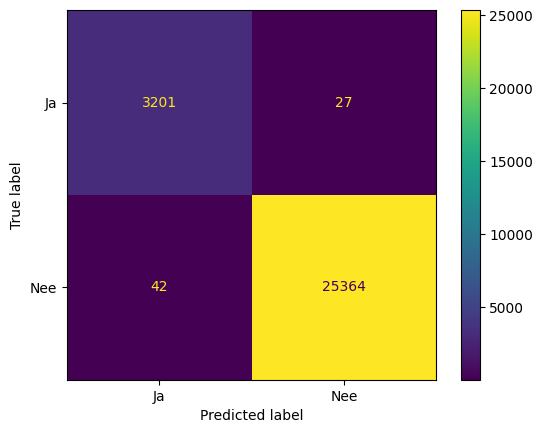

              precision    recall  f1-score   support

          Ja       0.99      0.99      0.99      3228
         Nee       1.00      1.00      1.00     25406

    accuracy                           1.00     28634
   macro avg       0.99      0.99      0.99     28634
weighted avg       1.00      1.00      1.00     28634



In [28]:
# Ngram 2 Less stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# No stopwords

In [29]:
Corpus["text"] = Corpus["text"].apply(no_stopwords)
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 109.21, NNZs: 379, Bias: 0.000000, T: 68719, Avg. loss: 0.189649
Total training time: 0.34 seconds.
-- Epoch 2
Norm: 148.24, NNZs: 148, Bias: 0.000000, T: 137438, Avg. loss: 0.140068
Total training time: 0.73 seconds.
-- Epoch 3
Norm: 177.65, NNZs: 119, Bias: 0.000000, T: 206157, Avg. loss: 0.127979
Total training time: 1.12 seconds.
-- Epoch 4
Norm: 202.26, NNZs: 107, Bias: 0.000000, T: 274876, Avg. loss: 0.120527
Total training time: 1.53 seconds.
-- Epoch 5
Norm: 223.84, NNZs: 95, Bias: 0.000000, T: 343595, Avg. loss: 0.115397
Total training time: 2.00 seconds.
-- Epoch 6
Norm: 243.39, NNZs: 91, Bias: 0.000000, T: 412314, Avg. loss: 0.111523
Total training time: 2.44 seconds.
-- Epoch 7
Norm: 246.86, NNZs: 90, Bias: 0.000000, T: 481033, Avg. loss: 0.109397
Total training time: 2.84 seconds.
-- Epoch 8
Norm: 250.28, NNZs: 90, Bias: 0.000000, T: 549752, Avg. loss: 0.108797
Total training time: 3.23 seconds.


/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.180 total time= 1.4min
-- Epoch 1
Norm: 109.24, NNZs: 358, Bias: 0.000000, T: 68719, Avg. loss: 0.190097
Total training time: 0.38 seconds.
-- Epoch 2
Norm: 148.49, NNZs: 147, Bias: 0.000000, T: 137438, Avg. loss: 0.140013
Total training time: 0.74 seconds.
-- Epoch 3
Norm: 177.83, NNZs: 121, Bias: 0.000000, T: 206157, Avg. loss: 0.127898
Total training time: 1.13 seconds.
-- Epoch 4
Norm: 202.33, NNZs: 104, Bias: 0.000000, T: 274876, Avg. loss: 0.120865
Total training time: 1.50 seconds.
-- Epoch 5
Norm: 223.94, NNZs: 93, Bias: 0.000000, T: 343595, Avg. loss: 0.115639
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.181 total time=  53.1s
-- Epoch 1
Norm: 109.38, NNZs: 365, Bias: 0.000000, T: 68719, Avg. loss: 0.187898
Total training time: 0.35 seconds.
-- Epoch 2
Norm: 148.52, NNZs: 148, Bias: 0.000000, T: 137438, Avg. loss: 0.138176
Total training time: 0.70 seconds.
-- Epoch 3
Norm: 177.90, NNZs: 122, Bias: 0.000000, T: 206157, Avg. loss: 0.125826
Total training time: 1.06 seconds.
-- Epoch 4
Norm: 202.40, NNZs: 108, Bias: 0.000000, T: 274876, Avg. loss: 0.118884
Total training time: 1.43 seconds.
-- Epoch 5
Norm: 224.00, NNZs: 99, Bias: 0.000000, T: 343595, Avg. loss: 0.113641
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.183 total time=  53.4s
-- Epoch 1
Norm: 109.34, NNZs: 356, Bias: 0.000000, T: 68720, Avg. loss: 0.189182
Total training time: 0.33 seconds.
-- Epoch 2
Norm: 148.26, NNZs: 146, Bias: 0.000000, T: 137440, Avg. loss: 0.139220
Total training time: 0.72 seconds.
-- Epoch 3
Norm: 177.55, NNZs: 122, Bias: 0.000000, T: 206160, Avg. loss: 0.127121
Total training time: 1.09 seconds.
-- Epoch 4
Norm: 202.01, NNZs: 107, Bias: 0.000000, T: 274880, Avg. loss: 0.120282
Total training time: 1.44 seconds.
-- Epoch 5
Norm: 223.50, NNZs: 96, Bias: 0.000000, T: 343600, Avg. loss: 0.115194
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.179 total time=  53.0s
-- Epoch 1
Norm: 109.18, NNZs: 353, Bias: 0.000000, T: 68720, Avg. loss: 0.190422
Total training time: 0.39 seconds.
-- Epoch 2
Norm: 148.51, NNZs: 147, Bias: 0.000000, T: 137440, Avg. loss: 0.139776
Total training time: 0.75 seconds.
-- Epoch 3
Norm: 178.04, NNZs: 125, Bias: 0.000000, T: 206160, Avg. loss: 0.127115
Total training time: 1.14 seconds.
-- Epoch 4
Norm: 202.81, NNZs: 109, Bias: 0.000000, T: 274880, Avg. loss: 0.119747
Total training time: 1.51 seconds.
-- Epoch 5
Norm: 224.52, NNZs: 96, Bias: 0.000000, T: 343600, Avg. loss: 0.114543
Total train

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.182 total time=  52.7s
-- Epoch 1
Norm: 118570874584844.05, NNZs: 380517, Bias: 0.000000, T: 68719, Avg. loss: 141904042282124912361472.000000
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 111881247845297.78, NNZs: 380518, Bias: 0.000000, T: 137438, Avg. loss: 120746770875396703387648.000000
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 108467536677251.89, NNZs: 380518, Bias: 0.000000, T: 206157, Avg. loss: 100040692648756979433472.000000
Total training time: 0.93 seconds.
-- Epoch 4
Norm: 106215482338964.52, NNZs: 380518, Bias: 0.000000, T: 274876, Avg. loss: 90406539

Norm: 292.22, NNZs: 173, Bias: 0.000000, T: 412314, Avg. loss: 0.043340
Total training time: 1.49 seconds.
Convergence after 6 epochs took 1.52 seconds
[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.974 total time=  46.4s
-- Epoch 1
Norm: 142.75, NNZs: 538, Bias: 0.000000, T: 68719, Avg. loss: 0.084048
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 186.90, NNZs: 222, Bias: 0.000000, T: 137438, Avg. loss: 0.052980
Total training time: 0.48 seconds.
-- Epoch 3
Norm: 219.64, NNZs: 199, Bias: 0.000000, T: 206157, Avg. loss: 0.048000
Total training time: 0.74 seconds.
-- Epoch 4
Norm: 246.74, NNZs: 177, Bias: 0.000000, T: 

Norm: 174.16, NNZs: 298, Bias: 0.000000, T: 343595, Avg. loss: 0.089228
Total training time: 1.47 seconds.
-- Epoch 6
Norm: 188.65, NNZs: 295, Bias: 0.000000, T: 412314, Avg. loss: 0.087973
Total training time: 1.77 seconds.
Convergence after 6 epochs took 1.80 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.139 total time=  44.7s
-- Epoch 1
Norm: 86.98, NNZs: 452, Bias: 0.000000, T: 68720, Avg. loss: 0.136661
Total training time: 0.28 seconds.
-- Epoch 2
Norm: 117.13, NNZs: 349, Bias: 0.000000, T: 137440, Avg. loss: 0.097936
Total training time: 0.58 seconds.
-- Epoch 3
Norm: 139.63, NNZs: 326, Bias: 0.000000, 

-- Epoch 4
Norm: 4.36, NNZs: 657804, Bias: 0.537913, T: 274880, Avg. loss: 0.054787
Total training time: 0.75 seconds.
-- Epoch 5
Norm: 4.37, NNZs: 657804, Bias: 0.555120, T: 343600, Avg. loss: 0.053521
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 4.39, NNZs: 657804, Bias: 0.568910, T: 412320, Avg. loss: 0.052620
Total training time: 1.14 seconds.
Convergence after 6 epochs took 1.18 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.470 total time=  46.0s
-- Epoch 1
Norm: 23.25, NNZs: 435895, Bias: 0.964317, T: 68719, Avg. loss: 0.080264
Total training time: 0.17 seconds.
-- Epoch 2
Norm: 22.12, NNZs: 472869, Bias:

Norm: 349.71, NNZs: 167, Bias: 0.000000, T: 206157, Avg. loss: 0.056502
Total training time: 0.57 seconds.
-- Epoch 4
Norm: 390.29, NNZs: 159, Bias: 0.000000, T: 274876, Avg. loss: 0.052551
Total training time: 0.76 seconds.
-- Epoch 5
Norm: 425.16, NNZs: 150, Bias: 0.000000, T: 343595, Avg. loss: 0.050391
Total training time: 0.94 seconds.
-- Epoch 6
Norm: 456.45, NNZs: 148, Bias: 0.000000, T: 412314, Avg. loss: 0.049592
Total training time: 1.13 seconds.
Convergence after 6 epochs took 1.16 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.985 total time=  44.5s
-- Epoch 1
Norm: 230.16, NNZs: 254, Bias: 0.000000, T: 

Norm: 1.71, NNZs: 381172, Bias: 0.000000, T: 137440, Avg. loss: 0.742619
Total training time: 0.25 seconds.
-- Epoch 3
Norm: 1.82, NNZs: 381172, Bias: 0.000000, T: 206160, Avg. loss: 0.738778
Total training time: 0.39 seconds.
-- Epoch 4
Norm: 1.89, NNZs: 381172, Bias: 0.000000, T: 274880, Avg. loss: 0.733323
Total training time: 0.53 seconds.
-- Epoch 5
Norm: 1.95, NNZs: 381172, Bias: 0.000000, T: 343600, Avg. loss: 0.727964
Total training time: 0.67 seconds.
-- Epoch 6
Norm: 1.99, NNZs: 381172, Bias: 0.000000, T: 412320, Avg. loss: 0.722639
Total training time: 0.81 seconds.
Convergence after 6 epochs took 0.84 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insensitive, clf__max_iter=60, clf__penalty=l2, clf__power_t=0.5467473202425025, clf__shuffle=True, clf__tol=0.9099604695658384, clf__w

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.811 total time=  46.6s
-- Epoch 1
Norm: 43.81, NNZs: 381212, Bias: 0.000000, T: 68719, Avg. loss: 0.321793
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 43.86, NNZs: 381212, Bias: 0.000000, T: 137438, Avg. loss: 0.297740
Total training time: 0.35 seconds.
-- Epoch 3
Norm: 43.86, NNZs: 381212, Bias: 0.000000, T: 206157, Avg. loss: 0.297736
Total training time: 0.52 seconds.
-- Epoch 4
Norm: 43.86, NNZs: 381212, Bias: 0.000000, T: 274876, Avg. loss: 0.297736
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 43.86, NNZs: 381212, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.809 total time=  47.1s
-- Epoch 1
Norm: 43.79, NNZs: 380767, Bias: 0.000000, T: 68719, Avg. loss: 0.323146
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 43.85, NNZs: 380767, Bias: 0.000000, T: 137438, Avg. loss: 0.298904
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 43.85, NNZs: 380767, Bias: 0.000000, T: 206157, Avg. loss: 0.298900
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 43.85, NNZs: 380767, Bias: 0.000000, T: 274876, Avg. loss: 0.298900
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 43.85, NNZs: 380767, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.810 total time=  46.7s
-- Epoch 1
Norm: 43.39, NNZs: 381175, Bias: 0.000000, T: 68720, Avg. loss: 0.322664
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 43.45, NNZs: 381175, Bias: 0.000000, T: 137440, Avg. loss: 0.298604
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 43.45, NNZs: 381175, Bias: 0.000000, T: 206160, Avg. loss: 0.298599
Total training time: 0.47 seconds.
-- Epoch 4
Norm: 43.45, NNZs: 381175, Bias: 0.000000, T: 274880, Avg. loss: 0.298599
Total training time: 0.64 seconds.
-- Epoch 5
Norm: 43.45, NNZs: 381175, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.813 total time=  46.0s
-- Epoch 1
Norm: 44.41, NNZs: 381449, Bias: 0.000000, T: 68720, Avg. loss: 0.321825
Total training time: 0.14 seconds.
-- Epoch 2
Norm: 44.46, NNZs: 381449, Bias: 0.000000, T: 137440, Avg. loss: 0.298351
Total training time: 0.30 seconds.
-- Epoch 3
Norm: 44.47, NNZs: 381449, Bias: 0.000000, T: 206160, Avg. loss: 0.298347
Total training time: 0.46 seconds.
-- Epoch 4
Norm: 44.47, NNZs: 381449, Bias: 0.000000, T: 274880, Avg. loss: 0.298347
Total training time: 0.63 seconds.
-- Epoch 5
Norm: 44.47, NNZs: 381449, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.811 total time=  45.8s
-- Epoch 1
Norm: 14.36, NNZs: 235270, Bias: 0.313873, T: 68719, Avg. loss: 0.020265
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 8.44, NNZs: 256094, Bias: 0.225883, T: 137438, Avg. loss: 0.000650
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 6.09, NNZs: 264337, Bias: 0.192963, T: 206157, Avg. loss: 0.000175
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 4.82, NNZs: 268043, Bias: 0.165324, T: 274876, Avg. loss: 0.000063
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 3.98, NNZs: 269984, Bias: 0.152038, T: 343595, Avg. loss: 0.000

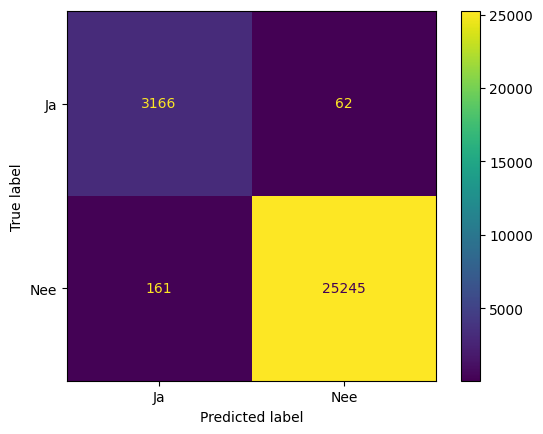

              precision    recall  f1-score   support

          Ja       0.95      0.98      0.97      3228
         Nee       1.00      0.99      1.00     25406

    accuracy                           0.99     28634
   macro avg       0.97      0.99      0.98     28634
weighted avg       0.99      0.99      0.99     28634



In [30]:
# Ngram 2 No stopwords
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

# BEST MODEL

In [8]:
# RESET CORPUS
Corpus = Corpus_backup.copy()
X_train, X_test, y_train, y_test = train_test_split(Corpus['text'], Corpus['label'], test_size=0.2, random_state=50)

In [9]:
parameter_grid = {'clf__loss':              ['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge', 'perceptron', 'squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                  'clf__penalty':           ['l2', 'l1'],
                  'clf__l1_ratio':          sp_randFloat(),
                  'clf__fit_intercept':     [True, False],
                  'clf__max_iter':          [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
                  'clf__tol':               sp_randFloat(),
                  'clf__shuffle':           [True, False],
                  'clf__epsilon':           sp_randFloat(),
                  'clf__learning_rate':     ['constant', 'optimal', 'invscaling', 'adaptive'],
                  'clf__eta0':              sp_randFloat(),
                  'clf__power_t':           sp_randFloat(),
                  'clf__class_weight':      ['balanced', None],
                  'clf__warm_start':        [True, False],
                  'clf__average':           [True, False],
                  'tfidf__max_df':          [0.90, 0.95],
                  'tfidf__min_df':          [3, 5]
                 }

Fitting 5 folds for each of 10 candidates, totalling 50 fits
-- Epoch 1
Norm: 112.46, NNZs: 520, Bias: 0.000000, T: 68719, Avg. loss: 0.192007
Total training time: 0.89 seconds.
-- Epoch 2
Norm: 153.56, NNZs: 173, Bias: 0.000000, T: 137438, Avg. loss: 0.138472
Total training time: 1.85 seconds.
-- Epoch 3
Norm: 184.34, NNZs: 141, Bias: 0.000000, T: 206157, Avg. loss: 0.126123
Total training time: 2.82 seconds.
-- Epoch 4
Norm: 210.27, NNZs: 118, Bias: 0.000000, T: 274876, Avg. loss: 0.119101
Total training time: 3.80 seconds.
-- Epoch 5
Norm: 232.95, NNZs: 111, Bias: 0.000000, T: 343595, Avg. loss: 0.114287
Total training time: 4.80 seconds.
-- Epoch 6
Norm: 253.55, NNZs: 105, Bias: 0.000000, T: 412314, Avg. loss: 0.110926
Total training time: 5.78 seconds.
-- Epoch 7
Norm: 257.29, NNZs: 105, Bias: 0.000000, T: 481033, Avg. loss: 0.109249
Total training time: 6.75 seconds.
-- Epoch 8
Norm: 260.93, NNZs: 105, Bias: 0.000000, T: 549752, Avg. loss: 0.108628
Total training time: 7.71 secon

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.183 total time= 2.1min
-- Epoch 1
Norm: 112.44, NNZs: 559, Bias: 0.000000, T: 68719, Avg. loss: 0.191580
Total training time: 0.91 seconds.
-- Epoch 2
Norm: 153.77, NNZs: 177, Bias: 0.000000, T: 137438, Avg. loss: 0.138295
Total training time: 1.87 seconds.
-- Epoch 3
Norm: 184.41, NNZs: 140, Bias: 0.000000, T: 206157, Avg. loss: 0.126061
Total training time: 2.85 seconds.
-- Epoch 4
Norm: 210.18, NNZs: 124, Bias: 0.000000, T: 274876, Avg. loss: 0.119418
Total training time: 3.91 seconds.
-- Epoch 5
Norm: 233.12, NNZs: 110, Bias: 0.000000, T: 343595, Avg. loss: 0.114506
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.181 total time= 2.1min
-- Epoch 1
Norm: 112.25, NNZs: 527, Bias: 0.000000, T: 68719, Avg. loss: 0.192389
Total training time: 1.01 seconds.
-- Epoch 2
Norm: 153.26, NNZs: 173, Bias: 0.000000, T: 137438, Avg. loss: 0.139058
Total training time: 2.17 seconds.
-- Epoch 3
Norm: 184.29, NNZs: 139, Bias: 0.000000, T: 206157, Avg. loss: 0.126540
Total training time: 3.35 seconds.
-- Epoch 4
Norm: 210.08, NNZs: 123, Bias: 0.000000, T: 274876, Avg. loss: 0.119528
Total training time: 4.47 seconds.
-- Epoch 5
Norm: 232.74, NNZs: 112, Bias: 0.000000, T: 343595, Avg. loss: 0.114662
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.189 total time= 2.1min
-- Epoch 1
Norm: 112.60, NNZs: 449, Bias: 0.000000, T: 68720, Avg. loss: 0.191266
Total training time: 0.97 seconds.
-- Epoch 2
Norm: 153.65, NNZs: 177, Bias: 0.000000, T: 137440, Avg. loss: 0.137300
Total training time: 1.96 seconds.
-- Epoch 3
Norm: 184.51, NNZs: 144, Bias: 0.000000, T: 206160, Avg. loss: 0.124971
Total training time: 2.95 seconds.
-- Epoch 4
Norm: 210.42, NNZs: 123, Bias: 0.000000, T: 274880, Avg. loss: 0.118234
Total training time: 4.00 seconds.
-- Epoch 5
Norm: 233.23, NNZs: 113, Bias: 0.000000, T: 343600, Avg. loss: 0.113329
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.180 total time= 2.1min
-- Epoch 1
Norm: 112.14, NNZs: 515, Bias: 0.000000, T: 68720, Avg. loss: 0.192116
Total training time: 1.04 seconds.
-- Epoch 2
Norm: 153.36, NNZs: 173, Bias: 0.000000, T: 137440, Avg. loss: 0.138556
Total training time: 2.08 seconds.
-- Epoch 3
Norm: 184.22, NNZs: 138, Bias: 0.000000, T: 206160, Avg. loss: 0.126315
Total training time: 3.13 seconds.
-- Epoch 4
Norm: 210.09, NNZs: 124, Bias: 0.000000, T: 274880, Avg. loss: 0.119348
Total training time: 4.14 seconds.
-- Epoch 5
Norm: 232.93, NNZs: 111, Bias: 0.000000, T: 343600, Avg. loss: 0.114403
Total trai

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.06171699256249541, clf__eta0=0.6666115972798587, clf__fit_intercept=False, clf__l1_ratio=0.9792901432894962, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.15075392531110676, clf__shuffle=True, clf__tol=0.365636830734297, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.187 total time= 2.1min
-- Epoch 1
Norm: 119670278323928.23, NNZs: 789413, Bias: 0.000000, T: 68719, Avg. loss: 114444754650600398913536.000000
Total training time: 0.65 seconds.
-- Epoch 2
Norm: 113319224272726.03, NNZs: 789413, Bias: 0.000000, T: 137438, Avg. loss: 125869162915332135845888.000000
Total training time: 1.30 seconds.
-- Epoch 3
Norm: 110031106523020.89, NNZs: 789413, Bias: 0.000000, T: 206157, Avg. loss: 106284403393355994628096.000000
Total training time: 1.94 seconds.
-- Epoch 4
Norm: 107842253329986.61, NNZs: 789413, Bias: 0.000000, T: 274876, Avg. loss: 97112260

Norm: 281.07, NNZs: 154, Bias: 0.000000, T: 412314, Avg. loss: 0.030681
Total training time: 3.60 seconds.
Convergence after 6 epochs took 3.67 seconds
[CV 1/5] END clf__average=False, clf__class_weight=None, clf__epsilon=0.03646223783802971, clf__eta0=0.7491267567674796, clf__fit_intercept=False, clf__l1_ratio=0.775818217437024, clf__learning_rate=constant, clf__loss=squared_hinge, clf__max_iter=20, clf__penalty=l1, clf__power_t=0.4028006727705291, clf__shuffle=True, clf__tol=0.1730703028465106, clf__warm_start=True, tfidf__max_df=0.9, tfidf__min_df=3;, score=0.983 total time= 1.7min
-- Epoch 1
Norm: 138.90, NNZs: 735, Bias: 0.000000, T: 68719, Avg. loss: 0.072264
Total training time: 0.60 seconds.
-- Epoch 2
Norm: 181.33, NNZs: 223, Bias: 0.000000, T: 137438, Avg. loss: 0.041409
Total training time: 1.18 seconds.
-- Epoch 3
Norm: 212.57, NNZs: 197, Bias: 0.000000, T: 206157, Avg. loss: 0.036407
Total training time: 1.77 seconds.
-- Epoch 4
Norm: 238.41, NNZs: 168, Bias: 0.000000, T: 

Norm: 170.41, NNZs: 261, Bias: 0.000000, T: 343595, Avg. loss: 0.077717
Total training time: 3.30 seconds.
-- Epoch 6
Norm: 184.59, NNZs: 253, Bias: 0.000000, T: 412314, Avg. loss: 0.076392
Total training time: 3.97 seconds.
Convergence after 6 epochs took 4.03 seconds
[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.24457156361183285, clf__eta0=0.332929742792607, clf__fit_intercept=False, clf__l1_ratio=0.920539731041378, clf__learning_rate=constant, clf__loss=squared_error, clf__max_iter=100, clf__penalty=l1, clf__power_t=0.5734177157821045, clf__shuffle=True, clf__tol=0.6492274795888617, clf__warm_start=True, tfidf__max_df=0.95, tfidf__min_df=5;, score=0.177 total time= 1.7min
-- Epoch 1
Norm: 86.66, NNZs: 485, Bias: 0.000000, T: 68720, Avg. loss: 0.119433
Total training time: 0.57 seconds.
-- Epoch 2
Norm: 115.10, NNZs: 331, Bias: 0.000000, T: 137440, Avg. loss: 0.085665
Total training time: 1.20 seconds.
-- Epoch 3
Norm: 136.19, NNZs: 294, Bias: 0.000000, 

Norm: 4.31, NNZs: 1407995, Bias: 0.551122, T: 274880, Avg. loss: 0.054842
Total training time: 1.83 seconds.
-- Epoch 5
Norm: 4.34, NNZs: 1407995, Bias: 0.569681, T: 343600, Avg. loss: 0.053323
Total training time: 2.26 seconds.
-- Epoch 6
Norm: 4.36, NNZs: 1407995, Bias: 0.584614, T: 412320, Avg. loss: 0.052233
Total training time: 2.72 seconds.
Convergence after 6 epochs took 2.80 seconds
[CV 5/5] END clf__average=True, clf__class_weight=None, clf__epsilon=0.2527955528897454, clf__eta0=0.4377192284389271, clf__fit_intercept=True, clf__l1_ratio=0.6515110441465675, clf__learning_rate=invscaling, clf__loss=huber, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.47239053945705856, clf__shuffle=False, clf__tol=0.9089234089706554, clf__warm_start=False, tfidf__max_df=0.95, tfidf__min_df=3;, score=0.470 total time= 1.7min
-- Epoch 1
Norm: 22.84, NNZs: 868052, Bias: 0.852703, T: 68719, Avg. loss: 0.060361
Total training time: 0.45 seconds.
-- Epoch 2
Norm: 21.67, NNZs: 969336, Bias: 0.82441

Norm: 297.37, NNZs: 193, Bias: 0.000000, T: 137438, Avg. loss: 0.045796
Total training time: 0.88 seconds.
-- Epoch 3
Norm: 345.15, NNZs: 158, Bias: 0.000000, T: 206157, Avg. loss: 0.038501
Total training time: 1.29 seconds.
-- Epoch 4
Norm: 384.19, NNZs: 145, Bias: 0.000000, T: 274876, Avg. loss: 0.035607
Total training time: 1.70 seconds.
-- Epoch 5
Norm: 418.17, NNZs: 132, Bias: 0.000000, T: 343595, Avg. loss: 0.033978
Total training time: 2.12 seconds.
-- Epoch 6
Norm: 448.04, NNZs: 119, Bias: 0.000000, T: 412314, Avg. loss: 0.032444
Total training time: 2.53 seconds.
Convergence after 6 epochs took 2.59 seconds
[CV 2/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.3509613152086368, clf__eta0=0.9934401124631351, clf__fit_intercept=False, clf__l1_ratio=0.5204998682261415, clf__learning_rate=constant, clf__loss=hinge, clf__max_iter=40, clf__penalty=l1, clf__power_t=0.5098574122392232, clf__shuffle=False, clf__tol=0.5563103350645606, clf__warm_start=False, tfidf_

-- Epoch 1
Norm: 1.48, NNZs: 789581, Bias: 0.000000, T: 68720, Avg. loss: 0.737186
Total training time: 0.20 seconds.
-- Epoch 2
Norm: 1.73, NNZs: 789581, Bias: 0.000000, T: 137440, Avg. loss: 0.747196
Total training time: 0.45 seconds.
-- Epoch 3
Norm: 1.85, NNZs: 789581, Bias: 0.000000, T: 206160, Avg. loss: 0.746204
Total training time: 0.70 seconds.
-- Epoch 4
Norm: 1.92, NNZs: 789581, Bias: 0.000000, T: 274880, Avg. loss: 0.743166
Total training time: 0.95 seconds.
-- Epoch 5
Norm: 1.98, NNZs: 789581, Bias: 0.000000, T: 343600, Avg. loss: 0.739213
Total training time: 1.20 seconds.
-- Epoch 6
Norm: 2.02, NNZs: 789581, Bias: 0.000000, T: 412320, Avg. loss: 0.735161
Total training time: 1.45 seconds.
Convergence after 6 epochs took 1.51 seconds
[CV 4/5] END clf__average=False, clf__class_weight=balanced, clf__epsilon=0.28658617296069355, clf__eta0=0.03398405924608927, clf__fit_intercept=False, clf__l1_ratio=0.08227014493927165, clf__learning_rate=invscaling, clf__loss=epsilon_insens

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 1/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.842 total time= 1.7min
-- Epoch 1
Norm: 45.71, NNZs: 789962, Bias: 0.000000, T: 68719, Avg. loss: 0.309029
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 45.76, NNZs: 789962, Bias: 0.000000, T: 137438, Avg. loss: 0.282519
Total training time: 0.63 seconds.
-- Epoch 3
Norm: 45.76, NNZs: 789962, Bias: 0.000000, T: 206157, Avg. loss: 0.282528
Total training time: 0.99 seconds.
-- Epoch 4
Norm: 45.76, NNZs: 789962, Bias: 0.000000, T: 274876, Avg. loss: 0.282528
Total training time: 1.37 seconds.
-- Epoch 5
Norm: 45.76, NNZs: 789962, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 2/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.845 total time= 1.7min
-- Epoch 1
Norm: 45.55, NNZs: 788899, Bias: 0.000000, T: 68719, Avg. loss: 0.308382
Total training time: 0.30 seconds.
-- Epoch 2
Norm: 45.59, NNZs: 788899, Bias: 0.000000, T: 137438, Avg. loss: 0.281871
Total training time: 0.64 seconds.
-- Epoch 3
Norm: 45.59, NNZs: 788899, Bias: 0.000000, T: 206157, Avg. loss: 0.281879
Total training time: 1.01 seconds.
-- Epoch 4
Norm: 45.59, NNZs: 788899, Bias: 0.000000, T: 274876, Avg. loss: 0.281879
Total training time: 1.38 seconds.
-- Epoch 5
Norm: 45.59, NNZs: 788899, Bias: 0.000000, T: 343595, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 3/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.840 total time= 1.7min
-- Epoch 1
Norm: 45.64, NNZs: 789578, Bias: 0.000000, T: 68720, Avg. loss: 0.308492
Total training time: 0.29 seconds.
-- Epoch 2
Norm: 45.69, NNZs: 789578, Bias: 0.000000, T: 137440, Avg. loss: 0.282122
Total training time: 0.61 seconds.
-- Epoch 3
Norm: 45.69, NNZs: 789578, Bias: 0.000000, T: 206160, Avg. loss: 0.282129
Total training time: 0.92 seconds.
-- Epoch 4
Norm: 45.69, NNZs: 789578, Bias: 0.000000, T: 274880, Avg. loss: 0.282129
Total training time: 1.24 seconds.
-- Epoch 5
Norm: 45.69, NNZs: 789578, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 4/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.846 total time= 1.7min
-- Epoch 1
Norm: 46.11, NNZs: 790003, Bias: 0.000000, T: 68720, Avg. loss: 0.306539
Total training time: 0.27 seconds.
-- Epoch 2
Norm: 46.16, NNZs: 790003, Bias: 0.000000, T: 137440, Avg. loss: 0.280774
Total training time: 0.62 seconds.
-- Epoch 3
Norm: 46.16, NNZs: 790003, Bias: 0.000000, T: 206160, Avg. loss: 0.280781
Total training time: 0.96 seconds.
-- Epoch 4
Norm: 46.16, NNZs: 790003, Bias: 0.000000, T: 274880, Avg. loss: 0.280781
Total training time: 1.29 seconds.
-- Epoch 5
Norm: 46.16, NNZs: 790003, Bias: 0.000000, T: 343600, Avg. loss: 0

/home/hjmuizelaar/miniconda3/envs/thesis_hielke/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[CV 5/5] END clf__average=True, clf__class_weight=balanced, clf__epsilon=0.42493015701647596, clf__eta0=0.6773009699604285, clf__fit_intercept=False, clf__l1_ratio=0.7301998277223162, clf__learning_rate=adaptive, clf__loss=log_loss, clf__max_iter=20, clf__penalty=l2, clf__power_t=0.017782879504616322, clf__shuffle=False, clf__tol=0.19519881462597577, clf__warm_start=False, tfidf__max_df=0.9, tfidf__min_df=5;, score=0.842 total time= 1.7min
-- Epoch 1
Norm: 12.46, NNZs: 419708, Bias: 0.254741, T: 68719, Avg. loss: 0.013424
Total training time: 0.13 seconds.
-- Epoch 2
Norm: 7.16, NNZs: 460294, Bias: 0.178492, T: 137438, Avg. loss: 0.000265
Total training time: 0.32 seconds.
-- Epoch 3
Norm: 5.09, NNZs: 475348, Bias: 0.147458, T: 206157, Avg. loss: 0.000056
Total training time: 0.50 seconds.
-- Epoch 4
Norm: 3.99, NNZs: 484332, Bias: 0.129064, T: 274876, Avg. loss: 0.000023
Total training time: 0.68 seconds.
-- Epoch 5
Norm: 3.30, NNZs: 490281, Bias: 0.117508, T: 343595, Avg. loss: 0.000

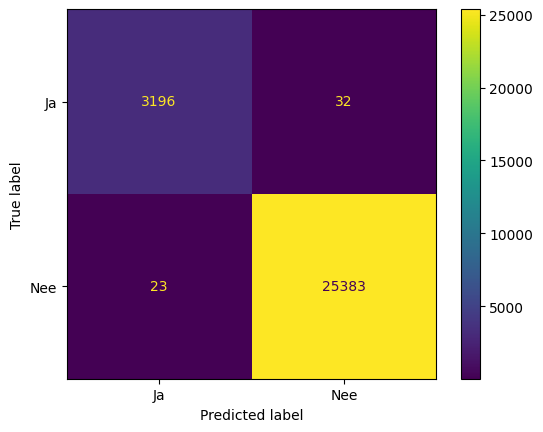

              precision    recall  f1-score   support

          Ja       0.99      0.99      0.99      3228
         Nee       1.00      1.00      1.00     25406

    accuracy                           1.00     28634
   macro avg       1.00      0.99      1.00     28634
weighted avg       1.00      1.00      1.00     28634



In [10]:
# Ngram 3 Stopwords kept
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,3), lowercase=True, token_pattern=r"(?u)\b\w\w+\b|\+|\-")),
    ('clf', SGDClassifier(early_stopping=True, n_iter_no_change=5, validation_fraction = 0.25, verbose=3)),
])
random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=parameter_grid, random_state=500, verbose=3, scoring='f1_macro')
random_search.fit(X_train, y_train)  
predicted_nb = random_search.predict(X_test)
print(np.mean(predicted_nb == y_test))
cm = confusion_matrix(y_test, predicted_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=random_search.classes_)
disp.plot()

plt.show()
print(metrics.classification_report(y_test, predicted_nb,
    target_names=random_search.classes_))

In [11]:
from pickle import dump

dump(random_search, open('best_models/best_drinking_ex2.pkl', 'wb'))